In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#pip install--upgrade threadpoolctl

In [3]:
data=pd.read_csv(r"C:\Users\jbnay\Downloads\Wine_clust .csv")

In [4]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
X=data.iloc[:,[0,12]].values

In [6]:
type(X)

numpy.ndarray

In [7]:
type(data)

pandas.core.frame.DataFrame

In [8]:
data.shape

(178, 13)

In [9]:
data.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [10]:
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

# Outlier handling

In [11]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

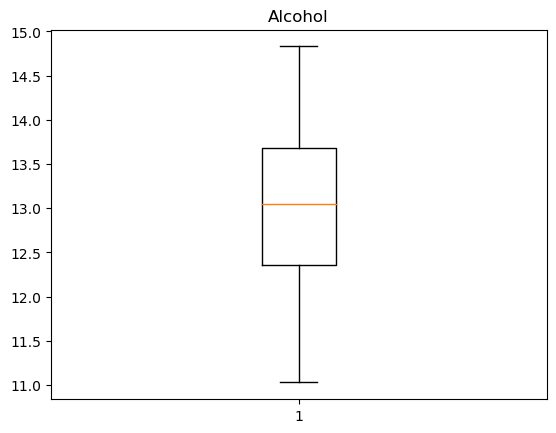

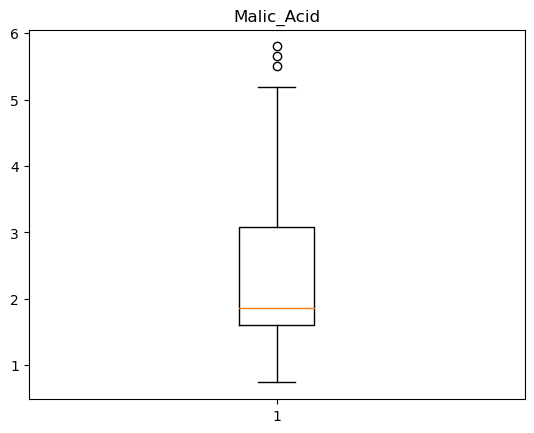

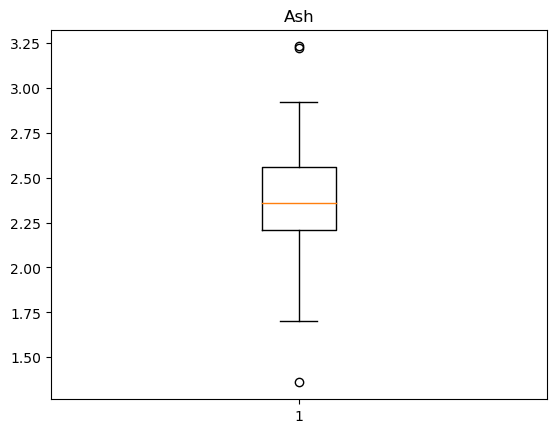

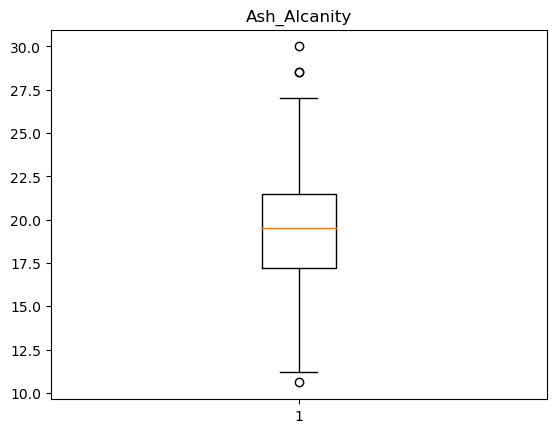

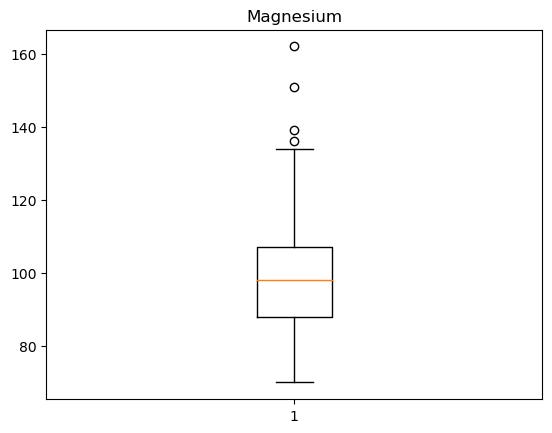

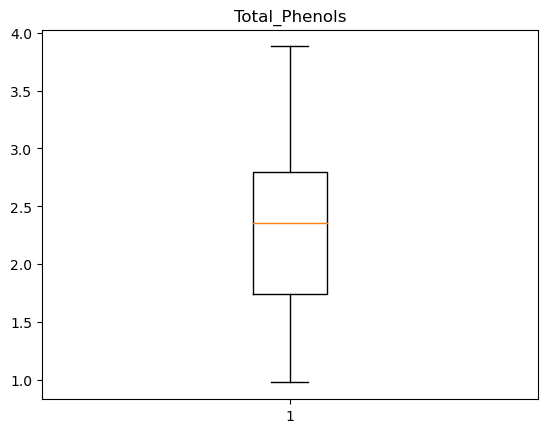

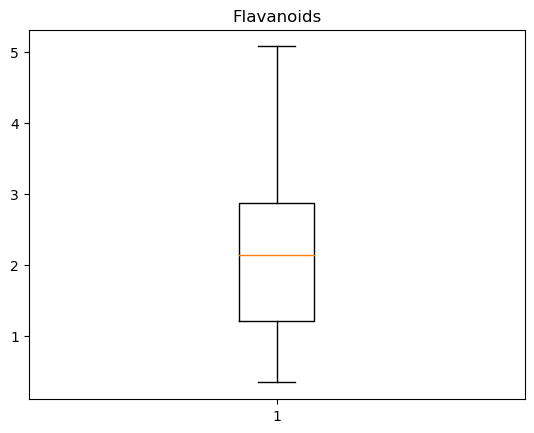

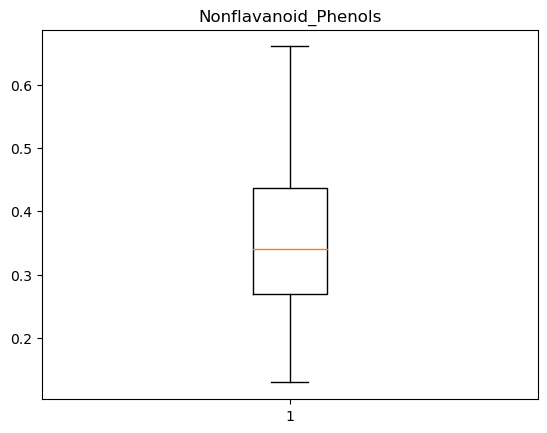

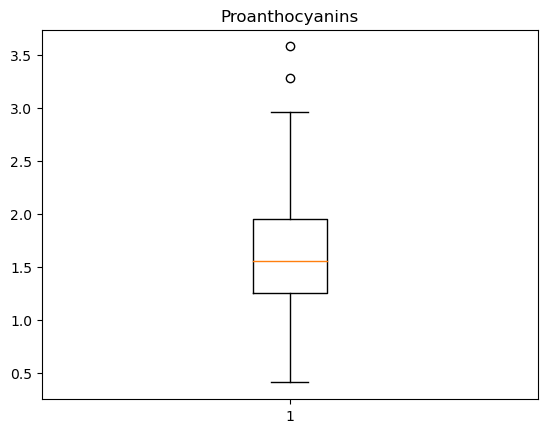

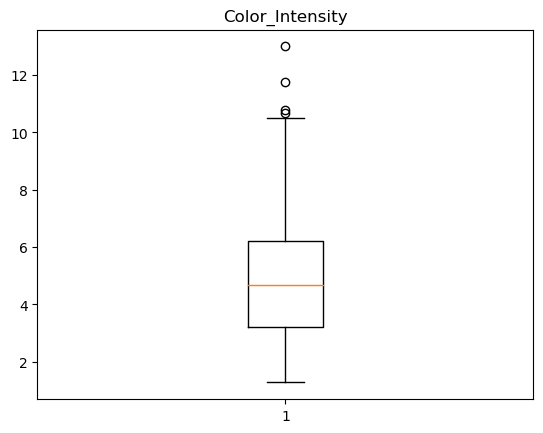

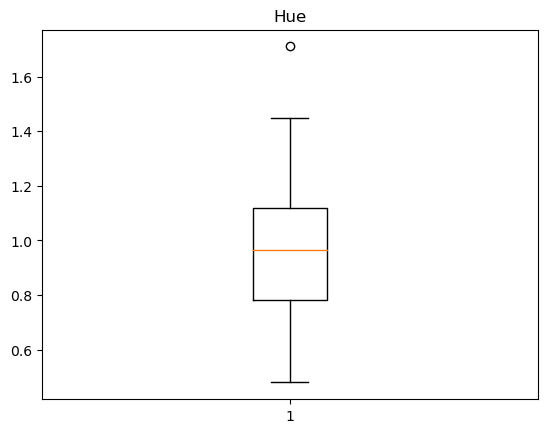

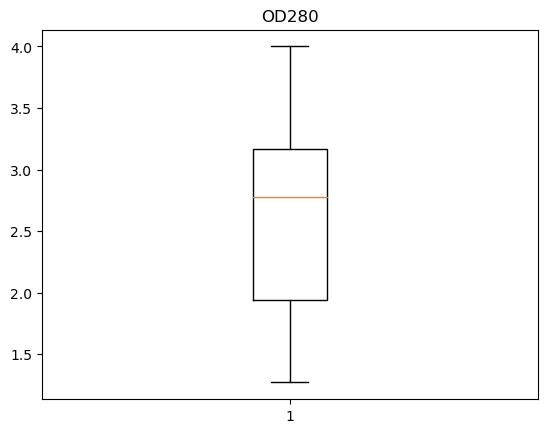

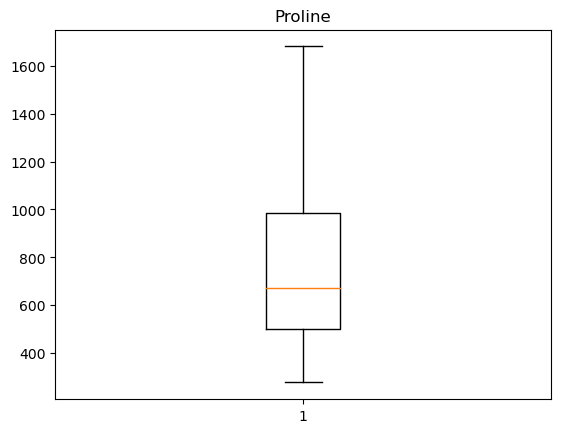

In [12]:
col = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']
for i in col:
    plt.boxplot(data[i])
    plt.title(i)
    plt.show()


In [13]:
#outlier handling of 'Malic acid' column
Q1_malic = data['Malic_Acid'].quantile(0.25)
Q2_malic = data['Malic_Acid'].quantile(0.50)
Q3_malic = data['Malic_Acid'].quantile(0.75)

print('Q1= ',Q1_malic)
print('Q2= ',Q2_malic)
print('Q3= ',Q3_malic)

IQR_malic = Q3_malic-Q1_malic
print('IQR= ',IQR_malic)

up_lim_malic = Q3_malic+1.5*IQR_malic
low_lim_malic = Q1_malic-1.5*IQR_malic

print('Upper limit= ',up_lim_malic)
print('Lower limit= ',low_lim_malic)

outlier_malic = []
for i in data['Malic_Acid']:
    if (i>up_lim_malic) or (i<low_lim_malic):
        outlier_malic.append(i)

print('Outlier= ',outlier_malic)


Q1=  1.6025
Q2=  1.8650000000000002
Q3=  3.0825
IQR=  1.48
Upper limit=  5.3025
Lower limit=  -0.6174999999999997
Outlier=  [5.8, 5.51, 5.65]


In [14]:
data['Malic_Acid'] = np.where(data['Malic_Acid']>up_lim_malic,up_lim_malic,
                              np.where(data['Malic_Acid']<low_lim_malic,low_lim_malic,data['Malic_Acid']))


In [15]:
#outlier handling of 'Ash' column
Q1_Ash = data['Ash'].quantile(0.25)
Q2_Ash = data['Ash'].quantile(0.50)
Q3_Ash = data['Ash'].quantile(0.75)

print('Q1= ',Q1_Ash)
print('Q2= ',Q2_Ash)
print('Q3= ',Q3_Ash)

IQR_Ash = Q3_Ash-Q1_Ash
print('IQR= ',IQR_Ash)

up_lim_Ash = Q3_Ash+1.5*IQR_Ash
low_lim_Ash = Q1_Ash-1.5*IQR_Ash

print('Upper limit= ',up_lim_Ash)
print('Lower limit= ',low_lim_Ash)

outlier_Ash = []
for i in data['Ash']:
    if (i>up_lim_Ash) or (i<low_lim_Ash):
        outlier_Ash.append(i)

print('Outlier= ',outlier_Ash)

Q1=  2.21
Q2=  2.36
Q3=  2.5575
IQR=  0.34750000000000014
Upper limit=  3.0787500000000003
Lower limit=  1.6887499999999998
Outlier=  [3.22, 1.36, 3.23]


In [16]:
data['Ash'] = np.where(data['Ash']>up_lim_Ash,up_lim_Ash,
                              np.where(data['Ash']<low_lim_Ash,low_lim_Ash,data['Ash']))


In [17]:
#outlier handling of 'Ash_Alcanity' column
Q1_alc = data['Ash_Alcanity'].quantile(0.25)
Q2_alc = data['Ash_Alcanity'].quantile(0.50)
Q3_alc = data['Ash_Alcanity'].quantile(0.75)

print('Q1= ',Q1_alc)
print('Q2= ',Q2_alc)
print('Q3= ',Q3_alc)

IQR_alc = Q3_alc-Q1_alc
print('IQR= ',IQR_alc)

up_lim_alc = Q3_alc+1.5*IQR_alc
low_lim_alc = Q1_alc-1.5*IQR_alc

print('Upper limit= ',up_lim_alc)
print('Lower limit= ',low_lim_alc)

outlier_alc= []
for i in data['Ash_Alcanity']:
    if (i>up_lim_alc) or (i<low_lim_alc):
        outlier_alc.append(i)

print('Outlier= ',outlier_alc)

Q1=  17.2
Q2=  19.5
Q3=  21.5
IQR=  4.300000000000001
Upper limit=  27.950000000000003
Lower limit=  10.749999999999998
Outlier=  [10.6, 30.0, 28.5, 28.5]


In [18]:
data['Ash_Alcanity'] = np.where(data['Ash_Alcanity']>up_lim_alc,up_lim_alc,
                              np.where(data['Ash_Alcanity']<low_lim_alc,low_lim_alc,data['Ash_Alcanity']))


In [19]:
#outlier handling of 'Magnesium' column
Q1_Mag = data['Magnesium'].quantile(0.25)
Q2_Mag = data['Magnesium'].quantile(0.50)
Q3_Mag = data['Magnesium'].quantile(0.75)

print('Q1= ',Q1_Mag)
print('Q2= ',Q2_Mag)
print('Q3= ',Q3_Mag)

IQR_Mag = Q3_Mag-Q1_Mag
print('IQR= ',IQR_Mag)

up_lim_Mag = Q3_Mag+1.5*IQR_Mag
low_lim_Mag = Q1_Mag-1.5*IQR_Mag

print('Upper limit= ',up_lim_Mag)
print('Lower limit= ',low_lim_Mag)

outlier_Mag= []
for i in data['Magnesium']:
    if (i>up_lim_Mag) or (i<low_lim_Mag):
        outlier_Mag.append(i)

print('Outlier= ',outlier_Mag)

Q1=  88.0
Q2=  98.0
Q3=  107.0
IQR=  19.0
Upper limit=  135.5
Lower limit=  59.5
Outlier=  [151, 139, 136, 162]


In [20]:
data['Magnesium'] = np.where(data['Magnesium']>up_lim_Mag,up_lim_Mag,
                              np.where(data['Magnesium']<low_lim_Mag,low_lim_Mag,data['Magnesium']))

In [21]:
#outlier handling of 'Proanthocyanins' column
Q1_pro = data['Proanthocyanins'].quantile(0.25)
Q2_pro = data['Proanthocyanins'].quantile(0.50)
Q3_pro = data['Proanthocyanins'].quantile(0.75)

print('Q1= ',Q1_pro)
print('Q2= ',Q2_pro)
print('Q3= ',Q3_pro)

IQR_pro = Q3_pro-Q1_pro
print('IQR= ',IQR_pro)

up_lim_pro = Q3_pro+1.5*IQR_pro
low_lim_pro = Q1_pro-1.5*IQR_pro

print('Upper limit= ',up_lim_pro)
print('Lower limit= ',low_lim_pro)

outlier_pro= []
for i in data['Proanthocyanins']:
    if (i>up_lim_pro) or (i<low_lim_pro):
        outlier_pro.append(i)

print('Outlier= ',outlier_pro)

Q1=  1.25
Q2=  1.5550000000000002
Q3=  1.95
IQR=  0.7
Upper limit=  3.0
Lower limit=  0.20000000000000018
Outlier=  [3.28, 3.58]


In [22]:
data['Proanthocyanins'] = np.where(data['Proanthocyanins']>up_lim_pro,up_lim_pro,
                              np.where(data['Proanthocyanins']<low_lim_pro,low_lim_pro,data['Proanthocyanins']))

In [23]:
#outlier handling of 'Color_Intensity' column
Q1_color = data['Color_Intensity'].quantile(0.25)
Q2_color = data['Color_Intensity'].quantile(0.50)
Q3_color = data['Color_Intensity'].quantile(0.75)

print('Q1= ',Q1_color)
print('Q2= ',Q2_color)
print('Q3= ',Q3_color)

IQR_color = Q3_color-Q1_color
print('IQR= ',IQR_color)

up_lim_color = Q3_color+1.5*IQR_color
low_lim_color = Q1_color-1.5*IQR_color

print('Upper limit= ',up_lim_color)
print('Lower limit= ',low_lim_color)

outlier_color= []
for i in data['Color_Intensity']:
    if (i>up_lim_color) or (i<low_lim_color):
        outlier_color.append(i)

print('Outlier= ',outlier_color)

Q1=  3.2199999999999998
Q2=  4.6899999999999995
Q3=  6.2
IQR=  2.9800000000000004
Upper limit=  10.670000000000002
Lower limit=  -1.2500000000000009
Outlier=  [10.8, 13.0, 11.75, 10.68]


In [24]:
data['Color_Intensity'] = np.where(data['Color_Intensity']>up_lim_color,up_lim_color,
                              np.where(data['Color_Intensity']<low_lim_color,low_lim_color,data['Color_Intensity']))


In [25]:
#outlier handling of 'Hue' column
Q1_Hue = data['Hue'].quantile(0.25)
Q2_Hue = data['Hue'].quantile(0.50)
Q3_Hue = data['Hue'].quantile(0.75)

print('Q1= ',Q1_Hue)
print('Q2= ',Q2_Hue)
print('Q3= ',Q3_Hue)

IQR_Hue = Q3_Hue-Q1_Hue
print('IQR= ',IQR_Hue)

up_lim_Hue = Q3_Hue+1.5*IQR_Hue
low_lim_Hue = Q1_Hue-1.5*IQR_Hue

print('Upper limit= ',up_lim_Hue)
print('Lower limit= ',low_lim_Hue)

outlier_Hue= []
for i in data['Hue']:
    if (i>up_lim_Hue) or (i<low_lim_Hue):
        outlier_Hue.append(i)

print('Outlier= ',outlier_Hue)

Q1=  0.7825
Q2=  0.965
Q3=  1.12
IQR=  0.33750000000000013
Upper limit=  1.6262500000000002
Lower limit=  0.2762499999999998
Outlier=  [1.71]


In [26]:
data['Hue'] = np.where(data['Hue']>up_lim_Hue,up_lim_Hue,
                              np.where(data['Hue']<low_lim_Hue,low_lim_Hue,data['Hue']))

In [27]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.330435,2.366721,19.478090,99.483146,2.295112,2.029270,0.361854,1.586067,5.038146,0.956979,2.611685,746.893258
std,0.811827,1.100173,0.263705,3.287757,13.414186,0.625851,0.998859,0.124453,0.558153,2.260881,0.227095,0.709990,314.907474
min,11.030000,0.740000,1.688750,10.750000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.302500,3.078750,27.950000,135.500000,3.880000,5.080000,0.660000,3.000000,10.670000,1.626250,4.000000,1680.000000


In [28]:
from sklearn.preprocessing import StandardScaler
scl= StandardScaler()
scaled_data=scl.fit_transform(data)
scaled_data=pd.DataFrame(scaled_data,columns=data.columns)
scaled_data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,178.000000,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.382808e-16,2.395088e-16,-4.478315e-16,-3.592632e-16,-7.983626e-17,0.000000,-3.991813e-16,3.592632e-16,2.395088e-16,-4.989766e-17,-7.983626e-17,3.193450e-16,-1.596725e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.449701e+00,-2.578195e+00,-2.662213e+00,-2.204108e+00,-2.107246,-1.695971e+00,-1.868234e+00,-2.113014e+00,-1.666938e+00,-2.106273e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.635217e-01,-5.959788e-01,-6.948555e-01,-8.584597e-01,-0.885468,-8.275393e-01,-7.401412e-01,-6.038048e-01,-8.064445e-01,-7.704749e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.242499e-01,-2.555683e-02,6.682950e-03,-1.108774e-01,0.095960,1.061497e-01,-1.760948e-01,-5.581813e-02,-1.544213e-01,3.541993e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.855158e-01,7.254987e-01,6.167164e-01,5.619467e-01,0.808997,8.490851e-01,6.095413e-01,6.538695e-01,5.153441e-01,7.198786e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,2.709072e+00,2.707715e+00,2.584074e+00,2.692556e+00,2.539515,3.062832e+00,2.402403e+00,2.540381e+00,2.498027e+00,2.955409e+00,1.960915e+00,2.971473e+00


# KMeans clustering

C:\Users\jbnay\Downloads\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jbnay\Downloads\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jbnay\Downloads\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jbnay\Downloads\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available thread

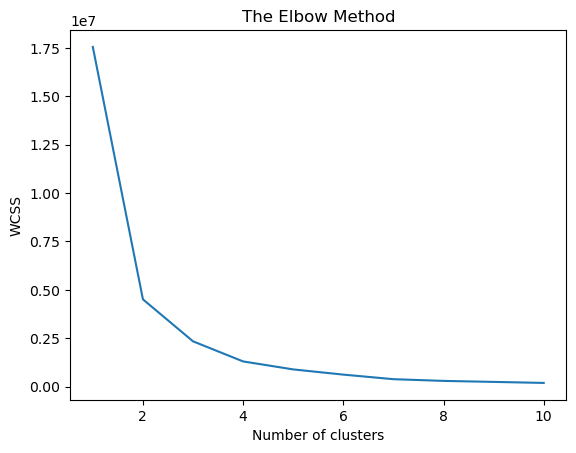

In [29]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [30]:
#The significance of the "random state" parameter lies in its ability to control the randomness and 
#reproducibility of results in machine learning algorithms
#choice of random state value is not inherently important; what matters is using a specific value to ensure 
#reproducibility across multiple runs of an algorithm

In [31]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

C:\Users\jbnay\Downloads\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jbnay\Downloads\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [32]:
#For each cluster, there are values of cluster centers according to the 
#number of columns present in the data.
kmeans.cluster_centers_

array([[  13.17769231,  823.57692308],
       [  13.9205    , 1360.85      ],
       [  12.47508772,  435.57894737],
       [  12.74166667,  636.125     ],
       [  13.71851852, 1072.40740741]])

In [33]:
#Assigning cluster to Customer type

# Get the cluster labels for each sample
labels = kmeans.labels_


# Add a new column for customer types based on cluster labels
data['Cluster'] = labels

In [34]:
from sklearn.decomposition import PCA

In [35]:
pca=PCA(n_components=2)
 
reduced_X=pd.DataFrame(data=pca.fit_transform(X),columns=['PCA1','PCA2'])
 
#Reduced Features
reduced_X.head()

,PCA1,PCA2
0,318.108344,0.701481
1,303.106655,-0.303625
2,438.106403,-0.567658
3,733.108005,0.152786
4,-11.892845,0.259119


In [36]:
#Reducing the cluster centers using PCA.
centers=pca.transform(kmeans.cluster_centers_)
 
# reduced centers
centers

array([[ 7.66838529e+01,  4.98172112e-02],
       [ 6.13957423e+02, -9.89831279e-02],
       [-3.11314755e+02, -8.90208100e-03],
       [-1.10768536e+02, -7.51305475e-02],
       [ 3.25514892e+02,  1.77707406e-01]])

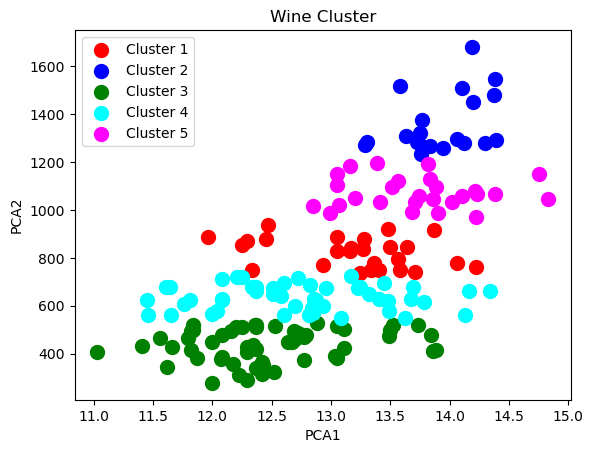

In [37]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Wine Cluster')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()



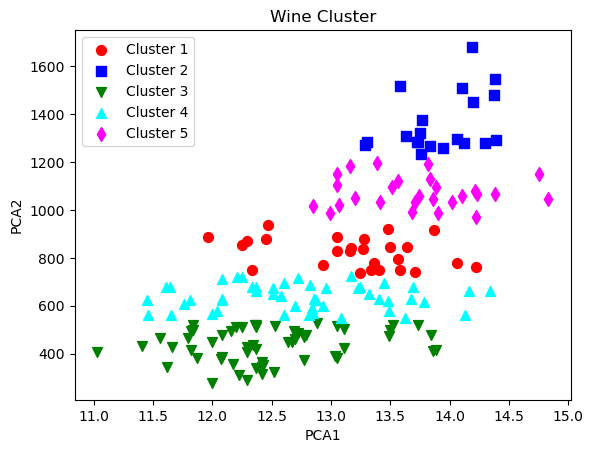

In [38]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1', marker = 'o')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2', marker = 's')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3', marker = 'v')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4', marker = '^')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5', marker = 'd')
plt.title('Wine Cluster')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

In [39]:
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
0,14.23,1.7100,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,4
1,13.20,1.7800,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,4
2,13.16,2.3600,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,4
3,14.37,1.9500,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.5900,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.3025,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0
174,13.40,3.9100,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0
175,13.27,4.2800,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0
176,13.17,2.5900,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0


In [40]:
# Checking with new values


new_input = [[136, 80]]

# Predict the cluster for the new input
new_cluster = kmeans.predict(new_input)

# Print the predicted cluster
print("Predicted Cluster:", new_cluster)

Predicted Cluster: [2]


In [41]:
from sklearn.metrics import silhouette_score

In [42]:
#Silhouette score of kmeans clustering
silhouette_avg1 = silhouette_score(X, y_kmeans)
print(silhouette_avg1)

0.5660679805900279


# Agglomerative Clustering

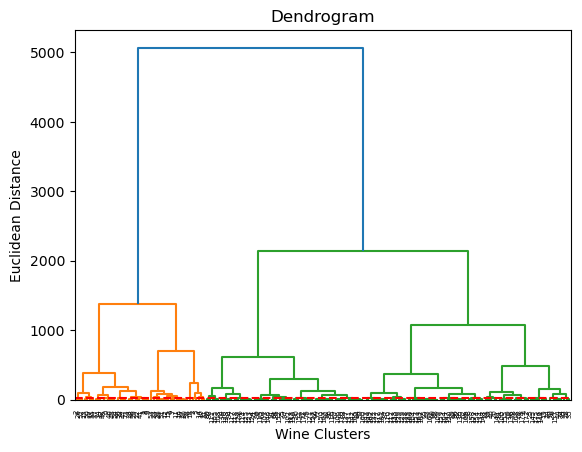

In [43]:
#Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(X,method='ward'))


# the linkage method determines how the distance between clusters is calculated
# the method ='ward' parameter in sch.linkage function refers to the ward's method of linkage
# ward's method is based on the analysis of variance(ANOVA)
# other method is Single likage ('single'),Complete linkage('complete') ,average linkage('average')
# centroid linkage('centroid')

plt.title('Dendrogram')
plt.xlabel('Wine Clusters')
plt.ylabel('Euclidean Distance')
plt.axhline(y=25,c='r',linestyle='--') 
plt.show()

In [44]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean' , linkage='ward')

y_hc = hc.fit_predict(X)

C:\Users\jbnay\Downloads\New folder\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


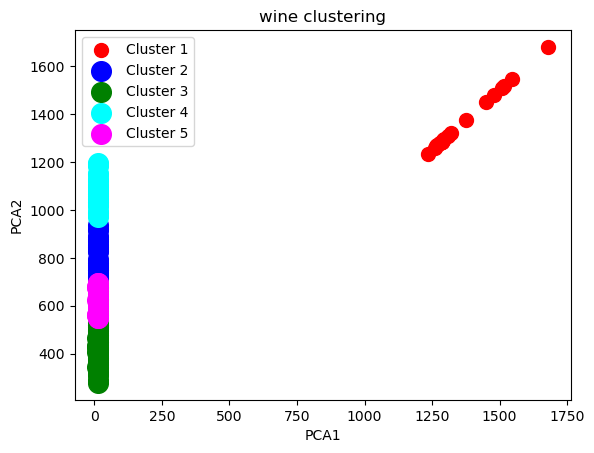

In [45]:
# plotting data points from cluster 1

plt.scatter(X[y_hc ==0,1], X[y_hc == 0,1 ], s=100, c='red' , label='Cluster 1')

#X[y_hc ==0,0] represents  x-coordinates of the data points in cluster 0
#X[y_hc ==0,1] represents  y-coordinates of the data points in cluster 0

# plotting data points from cluster 2
plt.scatter(X[y_hc == 1,0],X[y_hc == 1,1 ], s=200, c='blue' , label='Cluster 2')

# plotting data points from cluster 3
plt.scatter(X[y_hc == 2,0],X[y_hc == 2,1 ], s=200, c='green' , label='Cluster 3')

# plotting data points from cluster 4
plt.scatter(X[y_hc == 3,0],X[y_hc == 3,1 ], s=200, c='cyan' , label='Cluster 4')

# plotting data points from cluster 5
plt.scatter(X[y_hc == 4,0],X[y_hc == 4,1 ], s=200, c='magenta' , label='Cluster 5')


plt.title('wine clustering')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()




In [46]:
y_hc

array([3, 3, 3, 0, 1, 0, 0, 0, 3, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 1, 1, 1,
       3, 3, 1, 1, 3, 0, 1, 3, 0, 0, 3, 0, 3, 1, 1, 3, 3, 1, 1, 3, 3, 4,
       1, 3, 3, 3, 3, 0, 3, 0, 3, 0, 3, 3, 3, 0, 0, 2, 4, 2, 4, 2, 2, 4,
       2, 2, 1, 1, 1, 2, 2, 3, 1, 2, 2, 2, 1, 2, 2, 1, 4, 2, 2, 2, 2, 4,
       4, 4, 2, 2, 2, 2, 2, 1, 4, 2, 4, 2, 1, 4, 2, 2, 4, 2, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2,
       4, 4, 4, 4, 1, 2, 4, 4, 4, 1, 2, 4, 1, 1, 2, 4, 4, 4, 2, 2, 2, 4,
       4, 1, 2, 1, 4, 4, 2, 4, 4, 4, 4, 2, 4, 4, 1, 4, 2, 2, 4, 1, 1, 1,
       1, 4], dtype=int64)

In [47]:
#Silhouette score of agglomerative clustering
silhouette_avg2 = silhouette_score(X, y_hc)
print('Silhouette score of agglomerative clustering: ',silhouette_avg2)

Silhouette score of agglomerative clustering:  0.554538509465094


# DBSCAN clustering

In [48]:
data=pd.read_csv(r"C:\Users\jbnay\Downloads\Wine_clust .csv")

In [49]:
#Scaling

scaled_data = scl.fit_transform(data)
#values are stored as numpy array
scaled_data = pd.DataFrame(scaled_data, columns = data.columns)
#converted to DataFrame
scaled_data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,178.000000,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.382808e-16,-1.197544e-16,-8.370333e-16,-3.991813e-17,-3.991813e-17,0.000000,-3.991813e-16,3.592632e-16,-1.197544e-16,2.494883e-17,1.995907e-16,3.193450e-16,-1.596725e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-0.885468,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,0.095960,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,0.808997,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


In [50]:
X = scaled_data.values

In [51]:
from sklearn.neighbors import NearestNeighbors # importing the library
neighb = NearestNeighbors(n_neighbors=10) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(X) # fitting the data to the object
distances,indices=nbrs.kneighbors(X) # finding the nearest neighbours


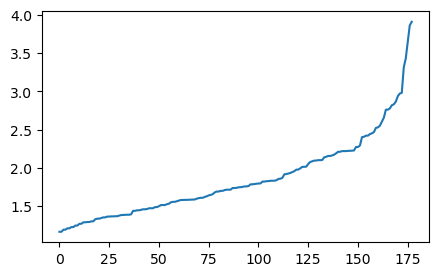

In [52]:
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show() # showing the plot

In [53]:
from sklearn.cluster import DBSCAN
# cluster the data into five clusters
dbscan = DBSCAN(eps = 2.5, min_samples = 8).fit(X) # fitting the model
labels = dbscan.labels_ # getting the labels

In [54]:
len(set(labels))

3

In [55]:
#data points count per label
unique,counts = np.unique(labels,return_counts=True)
np.asarray((unique,counts)).T


array([[ -1,  30],
       [  0, 103],
       [  1,  45]], dtype=int64)

In [56]:
silhouette_score_db = silhouette_score(X,labels)
print('Silhouette score of DBSCAN clustering: ',silhouette_score_db)

Silhouette score of DBSCAN clustering:  0.2076088441129092


In [57]:
#Silhouette score of DBSCAN clustering

silhouette_score_db = silhouette_score(X,labels)
print('Silhouette score of DBSCAN clustering: ',silhouette_score_db)


Silhouette score of DBSCAN clustering:  0.2076088441129092


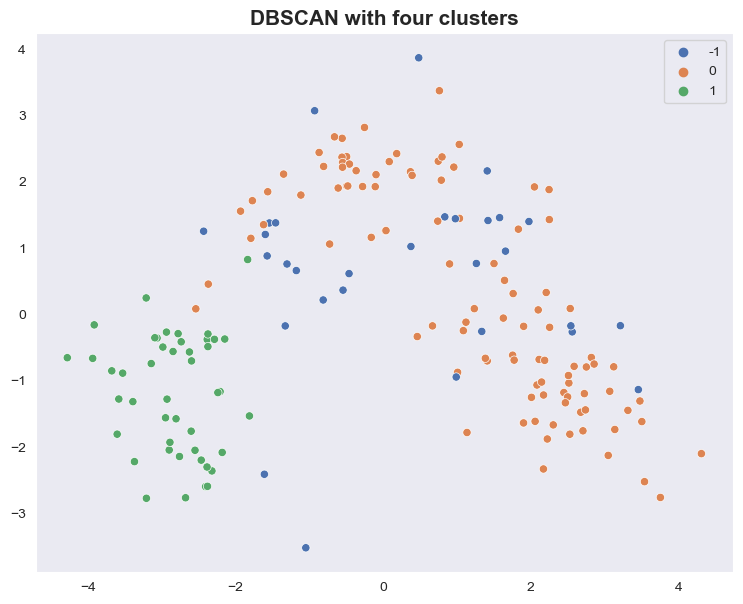

In [58]:
# Transform data to visualize data in 2d
from sklearn import decomposition
sns.set_style('dark')
pca = decomposition.PCA(n_components=3)
df_pca = pca.fit_transform(scaled_data)
plt.figure(figsize=(9,7))
sns.scatterplot(hue=dbscan.labels_, x=df_pca[:,0], y=df_pca[:,1],palette="deep")
plt.title("DBSCAN with four clusters",fontsize=15,fontweight="bold")
plt.show()

conclusion  :  Silhouette score of KMeans clustering is maximum.